In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from astropy import units as u
from astropy.coordinates import SkyCoord, Galactocentric, Distance

from astroquery.gaia import Gaia

np.random.seed(17)

In [3]:
# Perform Gaia query
# Note: for faster testing, change _job_async -> _job
job = Gaia.launch_job_async("select "
      "solution_id,ra,dec,astrometric_n_obs_al, "
      "ra,dec,l,b,parallax,parallax_over_error,pmra,pmdec, "
      "phot_rp_mean_mag,g_rp "
      "from gaiaedr3.gaia_source "
      "where parallax > 10.0 and parallax_error < 0.5 "
      "and g_rp > 1.2 and g_rp < 1.7 and phot_rp_mean_mag < 18.5 "
      "and (phot_rp_mean_mag + 5.0 * log10(parallax / 100.0)) > 10.0"
      "and parallax_over_error > 50.0")
r = job.get_results()
print(r['solution_id'])

INFO: Query finished. [astroquery.utils.tap.core]
    solution_id    
-------------------
1636042515805110273
1636042515805110273
1636042515805110273
1636042515805110273
1636042515805110273
1636042515805110273
1636042515805110273
1636042515805110273
1636042515805110273
1636042515805110273
                ...
1636042515805110273
1636042515805110273
1636042515805110273
1636042515805110273
1636042515805110273
1636042515805110273
1636042515805110273
1636042515805110273
1636042515805110273
1636042515805110273
1636042515805110273
Length = 82658 rows


In [4]:
# Construct plotting quantities
r['DM'] = -5. * np.log10(r['parallax'] / 100.)
r['M_R'] = r['phot_rp_mean_mag'] - r['DM']

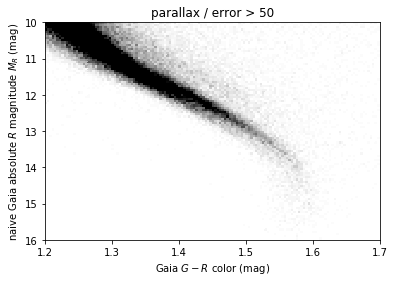

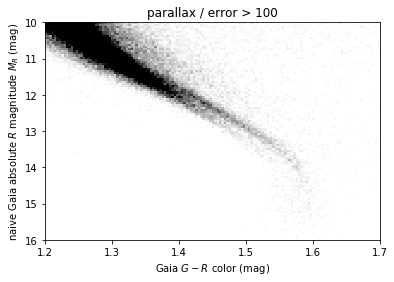

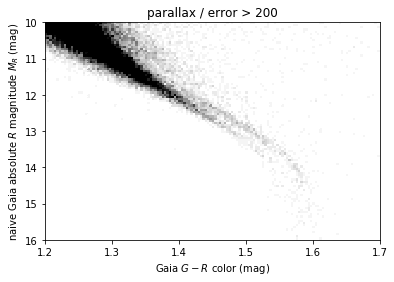

In [5]:
# Make plots
xlim = (1.2, 1.7)
ylim = (10., 16.)
for snrcut in ["50", "100", "200"]:
  snrcut_r = float(snrcut)
  idx = r['parallax_over_error'] > snrcut_r
  plt.figure()
  h, _, _, _ = plt.hist2d(r['g_rp'][idx], r['M_R'][idx], bins=[140, 100], range=[xlim, ylim],
             vmin=0., vmax=3, cmap="gray_r", density=True)
  plt.ylim(16, 10)
  plt.xlim(1.2, 1.7)
  plt.xlabel(r"Gaia $G-R$ color (mag)")
  plt.ylabel(r"naive Gaia absolute $R$ magnitude $M_R$ (mag)")
  plt.title(r"parallax / error > {}".format(snrcut))
  plt.show()

In [8]:
r.keys()

['solution_id',
 'ra',
 'dec',
 'astrometric_n_obs_al',
 'ra_2',
 'dec_2',
 'l',
 'b',
 'parallax',
 'parallax_over_error',
 'pmra',
 'pmdec',
 'phot_rp_mean_mag',
 'g_rp',
 'DM',
 'M_R']

Load the MEarth catalog.

In [66]:
df = pd.read_csv("../data/gaia_mearth_crossmatch.csv")
print(len(df.iloc[df.angDist.values < 1]), len(df))
df = df.iloc[df.angDist.values < 1]

2107 2571


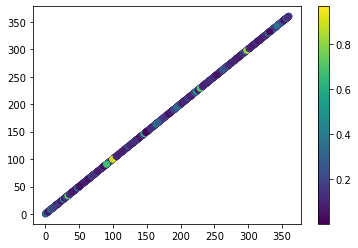

In [67]:
plt.scatter(df.ra, df._RAJ2000, c=df.angDist)
plt.colorbar()

In [68]:
# Construct plotting quantities
df['DM'] = -5. * np.log10(df['parallax'] / 100.)
df['M_R'] = df['phot_rp_mean_mag'] - df['DM']
df['g_rp'] = df['phot_g_mean_mag'] - df['phot_rp_mean_mag']

/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


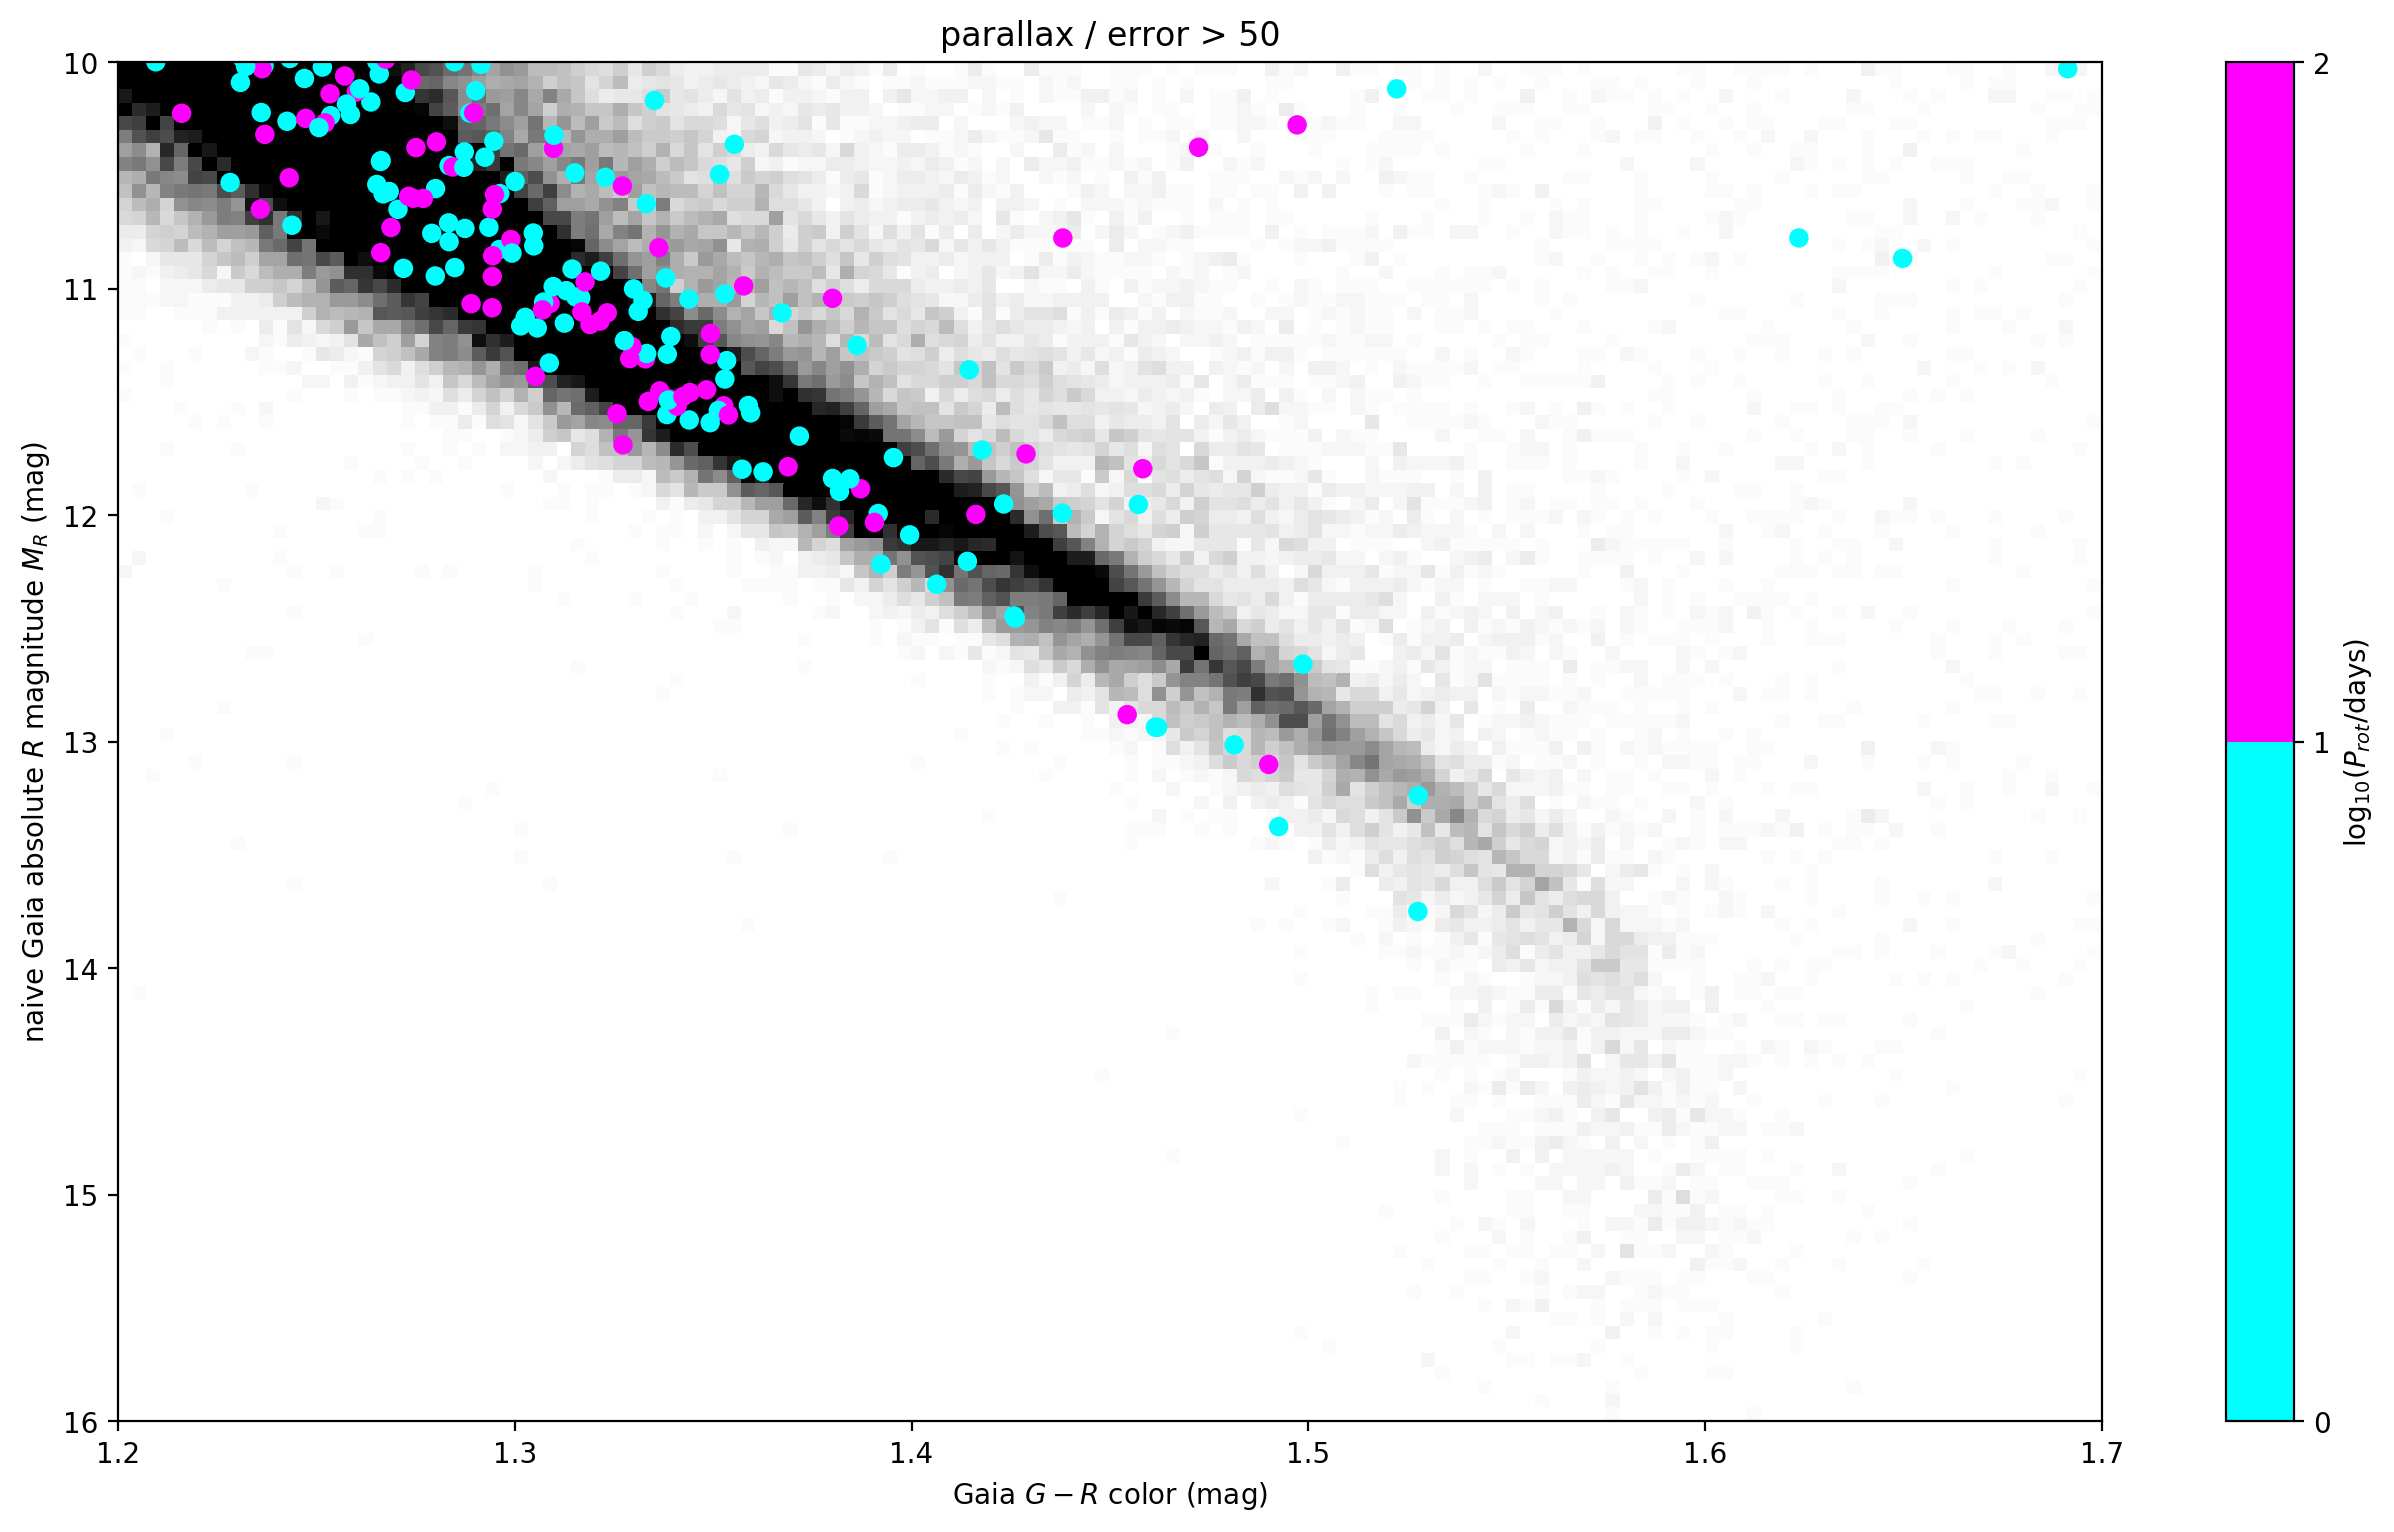

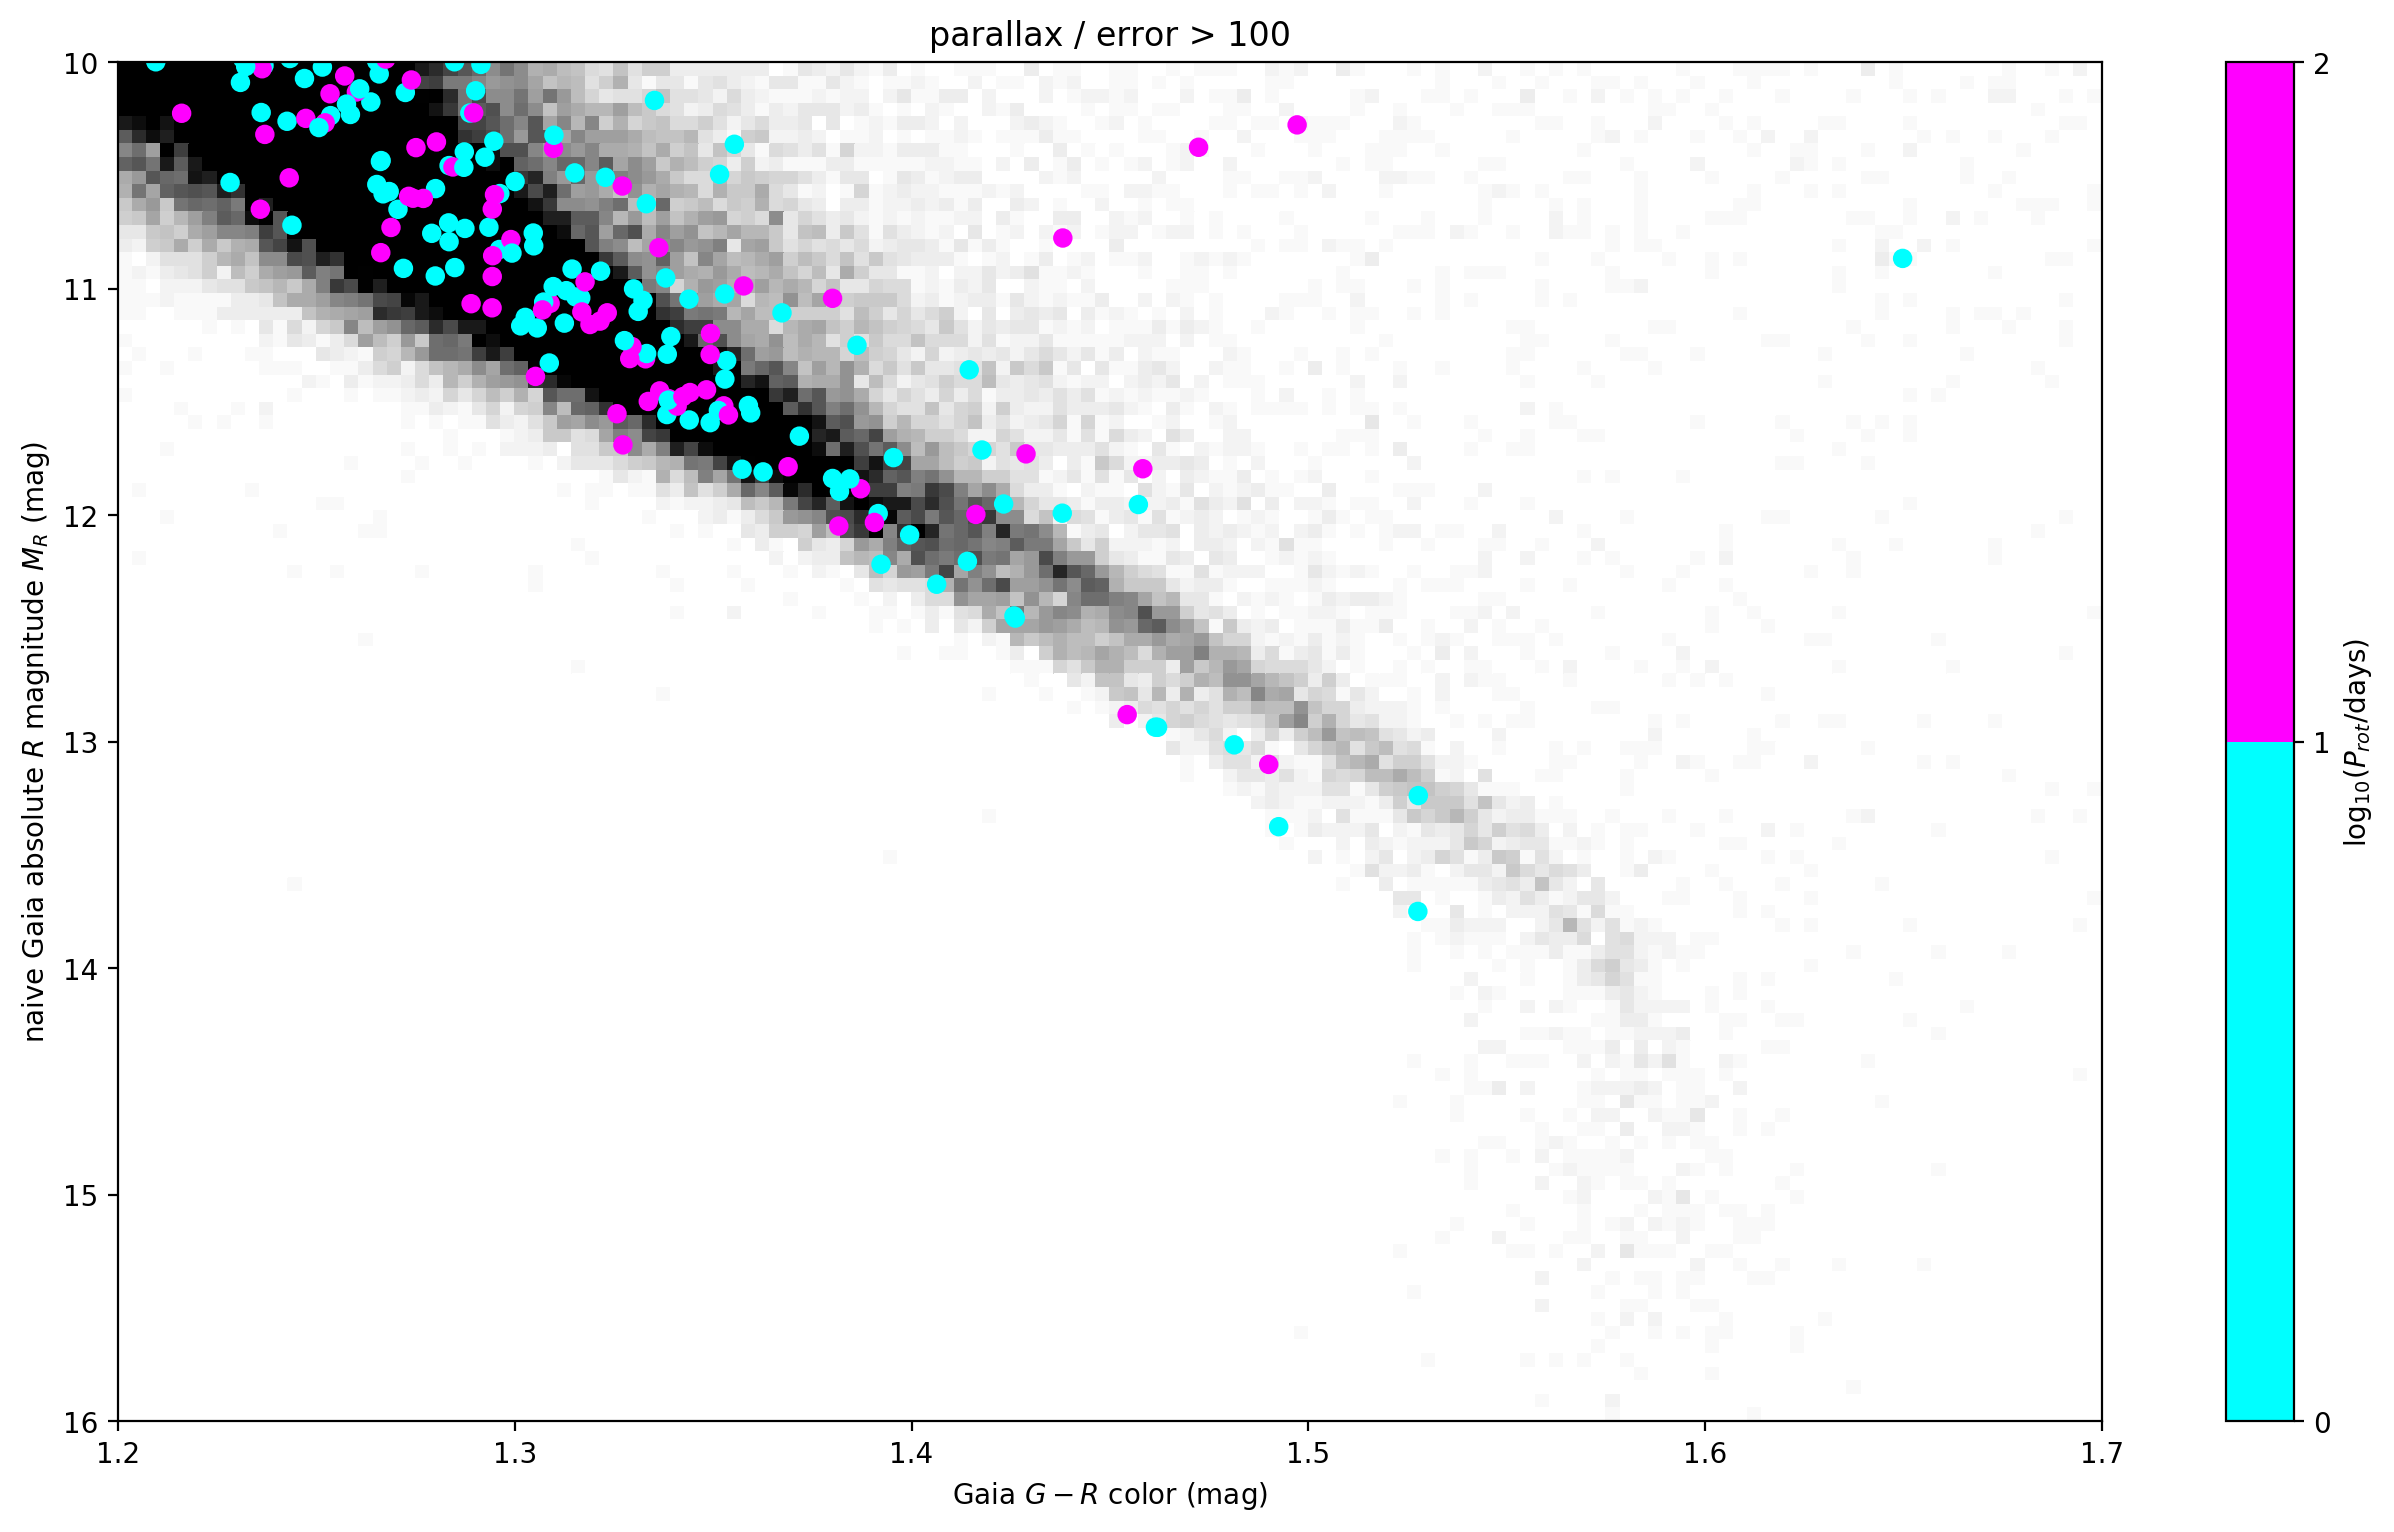

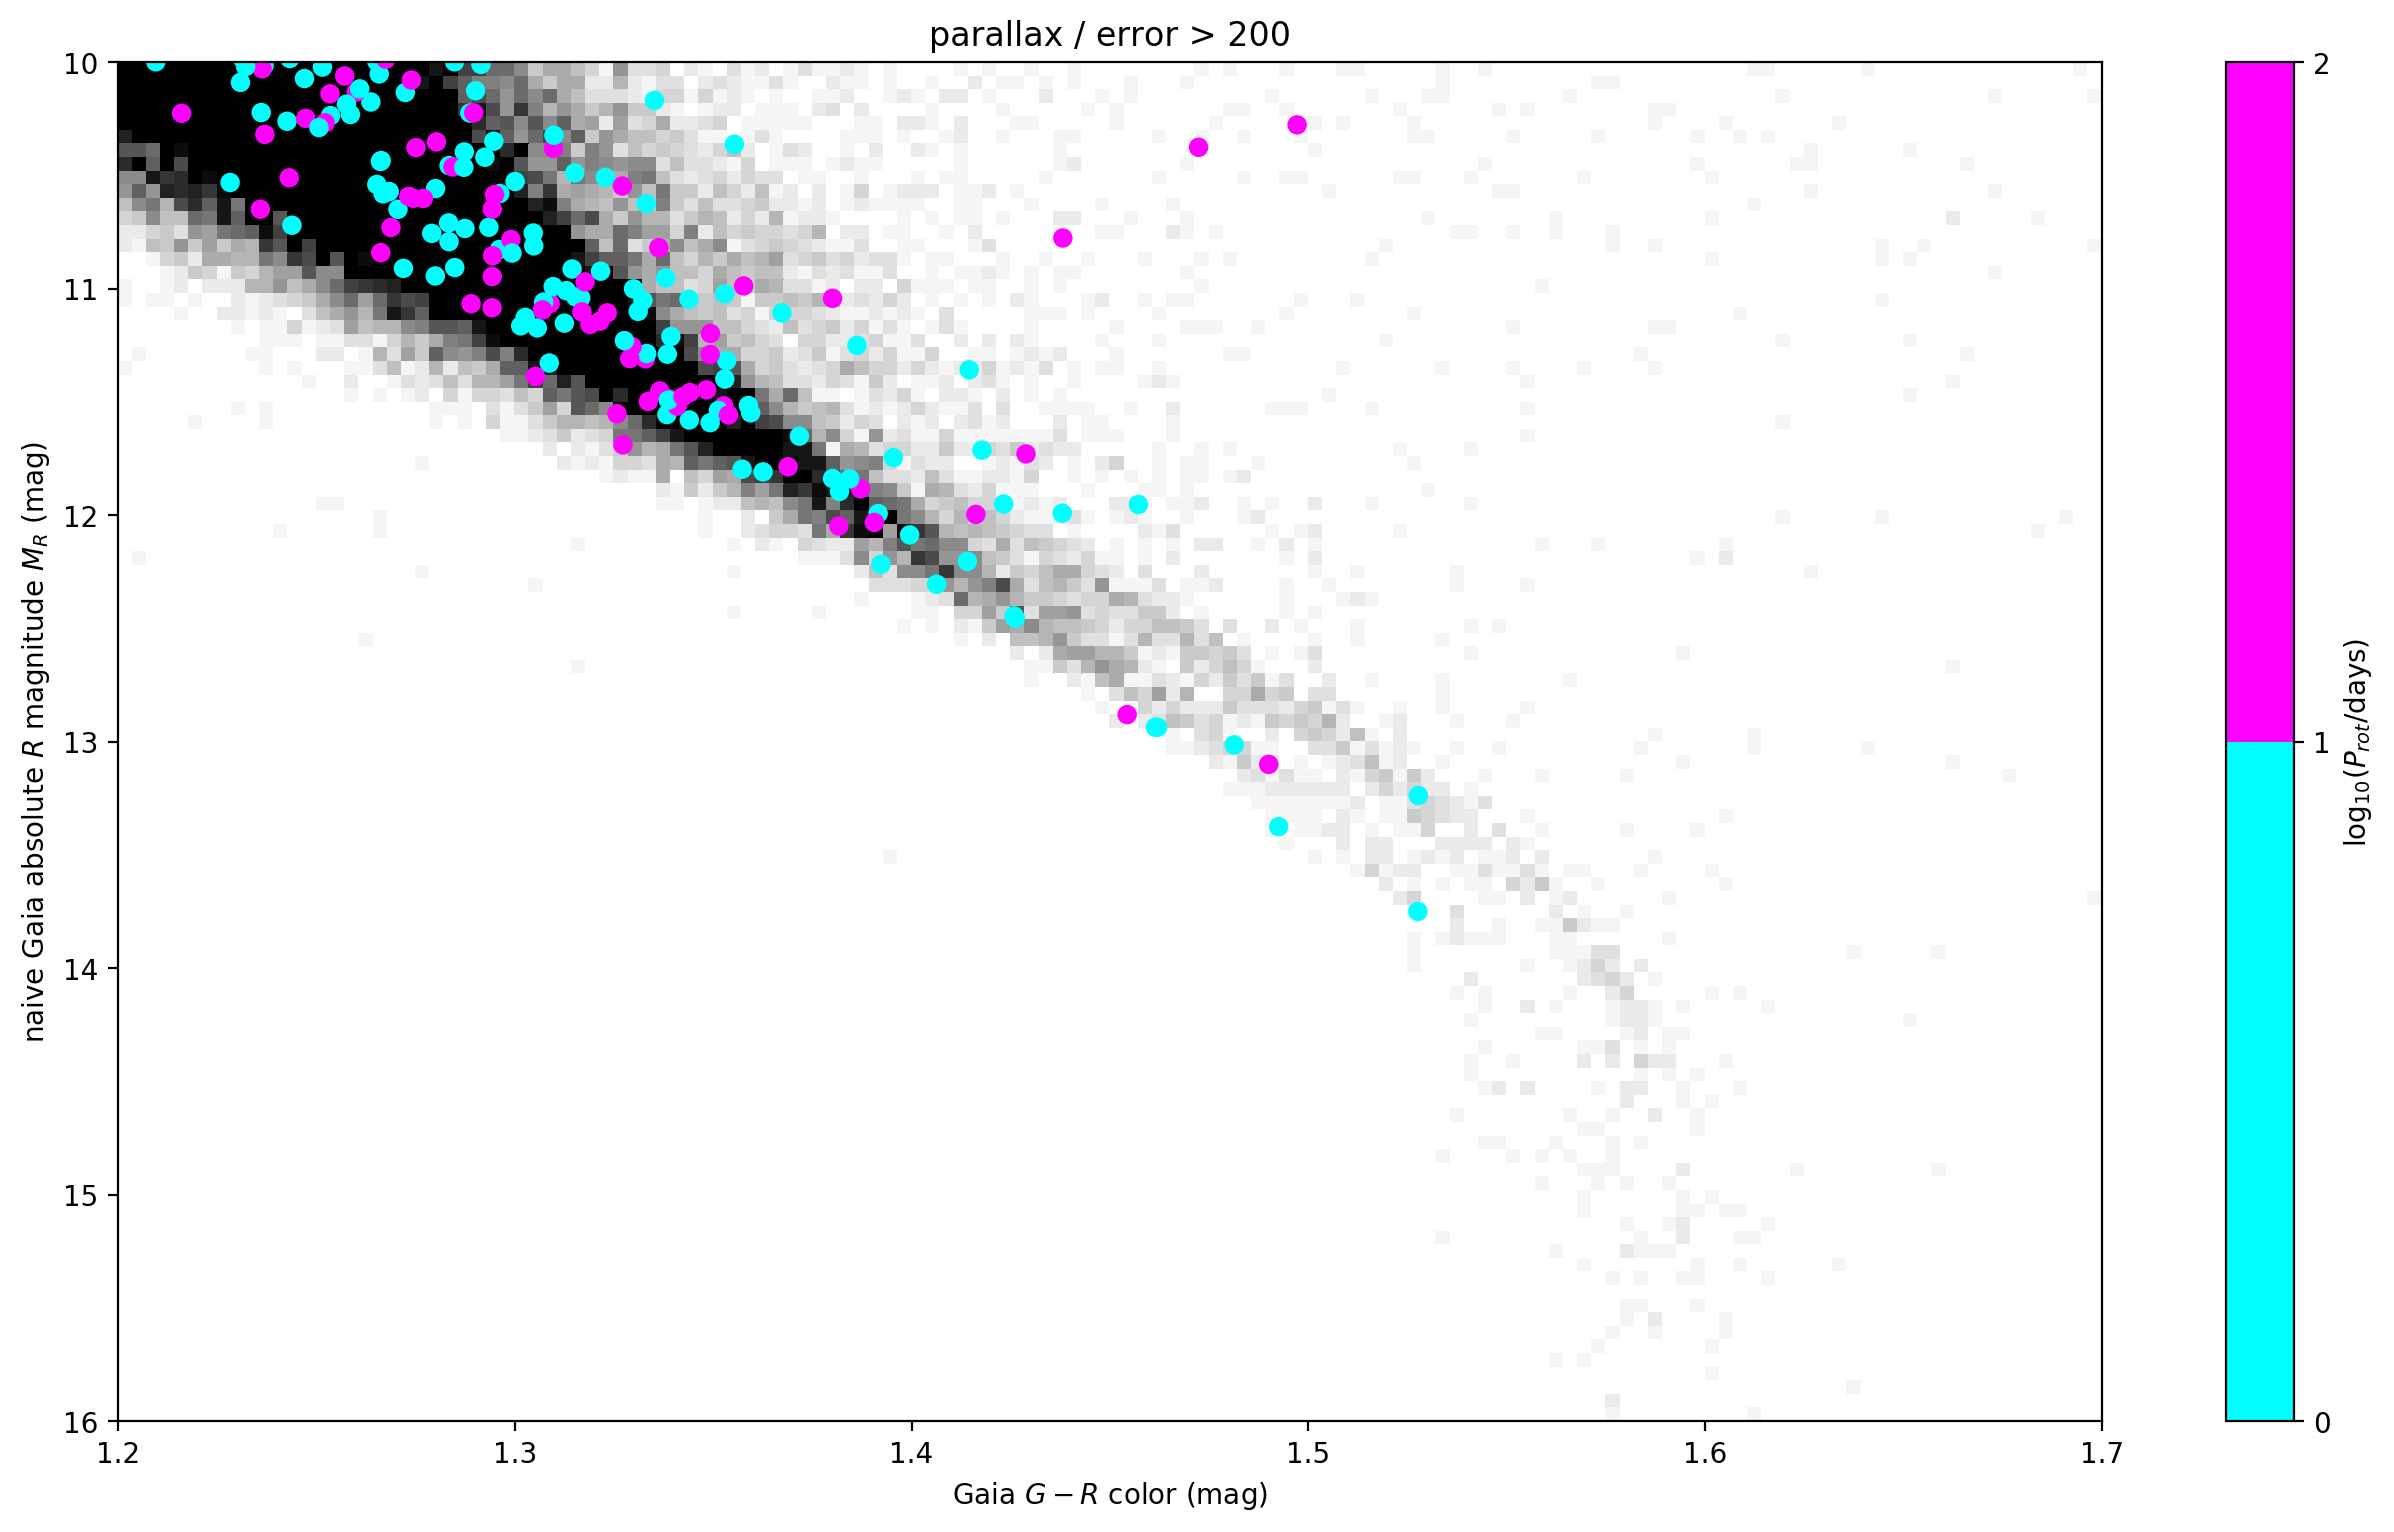

In [82]:
import matplotlib
cmap = plt.cm.cool
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0, 2, 3)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

# Make plots
xlim = (1.2, 1.7)
ylim = (10., 16.)
for snrcut in ["50", "100", "200"]:
    snrcut_r = float(snrcut)
    idx = r['parallax_over_error'] > snrcut_r
    m = df['parallax_over_error'] > snrcut_r
    plt.figure(figsize=(16, 9), dpi=200)
    h, _, _, _ = plt.hist2d(r['g_rp'][idx], r['M_R'][idx], bins=[140, 100], range=[xlim, ylim],
                            vmin=0., vmax=3, cmap="gray_r", density=True)
    
    plt.scatter(df["g_rp"][m], df["M_R"][m], c=np.log10(df["Per"])[m], cmap=cmap, norm=norm)
    plt.colorbar(label=r"$\log_{10}$($P_{rot}$/days)")
    
    plt.ylim(16, 10)
    plt.xlim(1.2, 1.7)
    plt.xlabel(r"Gaia $G-R$ color (mag)")
    plt.ylabel(r"naive Gaia absolute $R$ magnitude $M_R$ (mag)")
    plt.title(r"parallax / error > {}".format(snrcut))
    plt.show()

Text(0, 0.5, 'naive Gaia absolute $R$ magnitude $M_R$ (mag)')

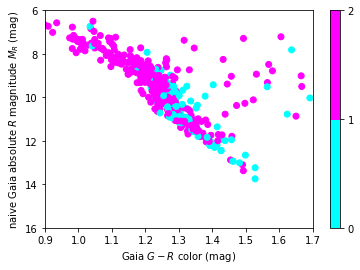

In [70]:
import matplotlib
cmap = plt.cm.cool
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0, 2, 3)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

plt.scatter(df["g_rp"], df["M_R"], c=df["Per"], cmap=cmap, norm=norm)
plt.colorbar()
plt.ylim(16, 6)
plt.xlim(.9, 1.7)
plt.xlabel(r"Gaia $G-R$ color (mag)")
plt.ylabel(r"naive Gaia absolute $R$ magnitude $M_R$ (mag)")

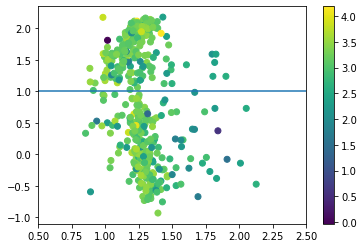

In [71]:
plt.scatter(df["g_rp"], np.log10(df["Per"]), c=np.log10(df["parallax_over_error"]))
plt.colorbar()
plt.xlim(0.5, 2.5)
plt.axhline(1)

In [73]:
df.keys()

Index(['angDist', '_RAJ2000', '_DEJ2000', '2MASS', 'RAJ2000', 'DEJ2000',
       'Mass', 'Rad', 'chi', 'Per', 'r_Per', 'EWHa', 'e_EWHa', 'logLHa', 'Act',
       'Bin', 'LSPM', 'Simbad', 'ra_epoch2000', 'dec_epoch2000', 'errHalfMaj',
       'errHalfMin', 'errPosAng', 'source_id', 'ra', 'ra_error', 'dec',
       'dec_error', 'parallax', 'parallax_error', 'parallax_over_error', 'pm',
       'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'astrometric_n_good_obs_al', 'astrometric_gof_al',
       'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_params_solved',
       'pseudocolour', 'pseudocolour_error', 'visibility_periods_used', 'ruwe',
       'duplicated_source', 'phot_g_mean_flux', 'phot_g_mean_flux_error',
       'phot_g_mean_mag', 'phot_bp_mean_flux', 'phot_bp_mean_flux_error',
       'phot_bp_mean_mag', 'phot_rp_mean_flux', 'phot_rp_mean_mag',
       'phot_bp_rp_excess_factor', 'bp_rp', 'dr2_radial_velocity',
       'dr2_radia

Text(0, 0.5, 'Prot [days]')

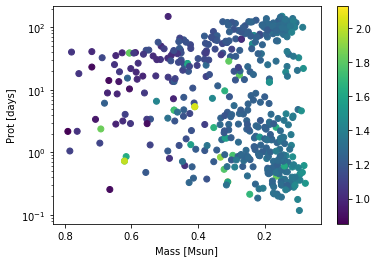

In [80]:
plt.scatter(df.Mass, df.Per, c=df["g_rp"])
plt.colorbar()
plt.gca().invert_xaxis()
plt.yscale("log")
plt.xlabel("Mass [Msun]")
plt.ylabel("Prot [days]")